In [ ]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 19.8 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
from sklearn.cluster import KMeans

In [ ]:
# Load the image
image_path = 'agni.jpg'
cv_image = cv2.imread(image_path)

if cv_image is None:
    print("Error loading image, check the file path or image format.")
else:
    print("Image loaded successfully!")

# Convert to HSV color space for easier color-based thresholding
hsv_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2HSV)

# Define the color range for white (background)
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 50, 255])
mask = cv2.inRange(hsv_image, lower_white, upper_white)

# Invert the mask to get the product (tea packet)
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image
result_image = cv2.bitwise_and(cv_image, cv_image, mask=mask_inv)

# Convert result to grayscale for contour detection
gray_result = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# Find contours
contours, _ = cv2.findContours(gray_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour
if contours:
    largest_contour = max(contours, key=cv2.contourArea)

    # Get bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

product_width = w  # width of the product
product_height = h  # height of the product

area=w*h

Image loaded successfully!


In [ ]:
# Initialize the EasyOCR reader with the desired language
reader = easyocr.Reader(['en'])  # You can add more languages if needed, e.g., ['en', 'fr']

# Load the image and perform OCR
result = reader.readtext(image_path)

# Print the detected text
texts=[]
for detection in result:
    bbox, text, confidence = detection
    if(confidence>0.95):
      print(f"Detected text: {text} (Confidence: {confidence:.2f})")
      texts.append(text)
print(texts)

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Detected text: TATA TEA (Confidence: 0.96)
Detected text: AGNI (Confidence: 0.99)
['TATA TEA', 'AGNI']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


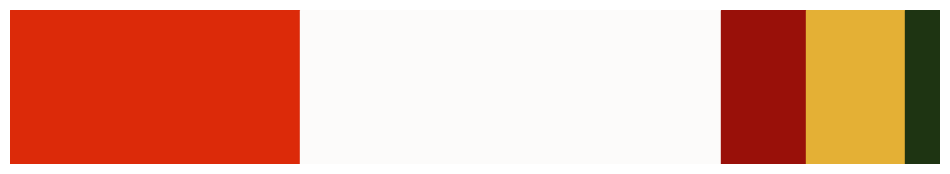

Color 1: RGB [220  42   9], Percentage: 31.17%
Color 2: RGB [252 251 250], Percentage: 45.32%
Color 4: RGB [228 176  53], Percentage: 10.62%
[[220, 42, 9], [252, 251, 250], [228, 176, 53]]


In [ ]:
def plot_colors(percentages, colors):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2), subplot_kw=dict(xticks=[], yticks=[], frame_on=False))
    width = 0
    for percent, color in zip(percentages, colors):
        ax.add_patch(plt.Rectangle((width, 0), percent, 1, color=color / 255.0))
        width += percent
    plt.show()

# Load the image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to be a list of pixels
pixels = image_rgb.reshape(-1, 3)

# Apply KMeans to find 5 dominant colors
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)

# Get the cluster centers (dominant colors)
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

# Get the percentage of each color
labels, counts = np.unique(kmeans.labels_, return_counts=True)
percentages = counts / len(kmeans.labels_)

# Plot the dominant colors with percentages
plot_colors(percentages, dominant_colors)
c=[]
# Output the dominant colors and their percentages
for i, (color, percentage) in enumerate(zip(dominant_colors, percentages)):
    if(percentage>0.10):
      c.append(list(color))
      print(f"Color {i+1}: RGB {color}, Percentage: {percentage*100:.2f}%")

print(c)


In [ ]:
a='chai 200g'
given_word,weight=a.split()
print(given_word)
print(weight)

chai
200g


In [ ]:
import pandas as pd
df=pd.DataFrame(columns=['size','text','color','given_text','weight'])

In [ ]:
df.loc[0]=[area,texts,c,given_word,weight]

In [ ]:
df

,size,text,color,given_text,weight
0,173883,"[TATA TEA, AGNI]","[[220, 42, 9], [252, 251, 250], [228, 176, 53]]",chai,200g
